# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [130]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

Revisemos los datos y veamos la estadística descriptiva básica:

In [131]:
penguins_df.sample(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
46,41.1,19.0,182.0,3425.0,MALE
200,51.5,18.7,187.0,3250.0,MALE
196,50.9,17.9,196.0,3675.0,FEMALE
159,51.3,18.2,197.0,3750.0,MALE
254,49.1,14.8,220.0,5150.0,FEMALE
292,48.2,15.6,221.0,5100.0,MALE
255,48.4,16.3,220.0,5400.0,MALE
129,44.1,18.0,210.0,4000.0,MALE
39,39.8,19.1,184.0,4650.0,MALE
2,40.3,18.0,195.0,3250.0,FEMALE


In [132]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


Ahora, buscamos valores nulos y los eliminamos: 

In [133]:
print(penguins_df.shape)
print(penguins_df.isna().sum())

(344, 5)
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [134]:
penguins_df.dropna(inplace=True)
print(penguins_df.isna().sum())
print(penguins_df.shape)

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
(335, 5)


Ahora veamos si existen outliers:

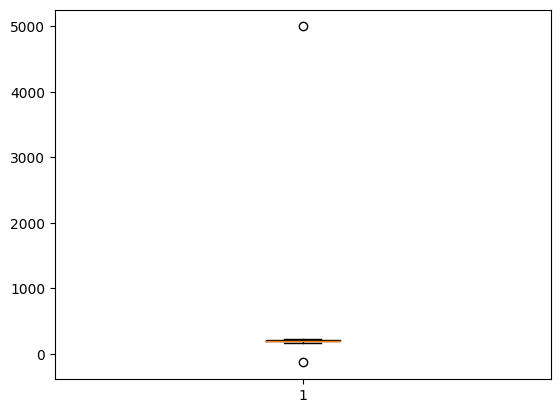

In [135]:
plt.boxplot(x='flipper_length_mm', data = penguins_df)
plt.show()

El boxplot nos muestra dos outliers para la columna "flipper_length_mm". Anteriormente cuando mostramos la estadística básica, se pudo observar rápidamente que esta columna presentaba valores anómalos en su mínimo y máximo. Estos valores corresponden a estos outliers encontrados. Como al parecer se deben a un error, decidimos eliminarlos de nuestro dataset.

In [136]:
print(penguins_df.shape)
q1 = penguins_df['flipper_length_mm'].quantile(0.25)
q3 = penguins_df['flipper_length_mm'].quantile(0.75)
IQR = q3 - q1

factor = 2.5
lower = q1 - (IQR * factor)
upper = q3 + (IQR * factor)

outliers = penguins_df[(penguins_df['flipper_length_mm'] < lower) | (penguins_df['flipper_length_mm'] > upper)]

print(f"Outliers encontrados: {len(outliers)}")

penguins_clean = penguins_df[~(penguins_df['flipper_length_mm'] < lower) & ~(penguins_df['flipper_length_mm'] > upper)]
print(penguins_clean.shape)




(335, 5)
Outliers encontrados: 2
(333, 5)


Si vemos nuevamente el boxplot, ya no nos muestra los outliers:

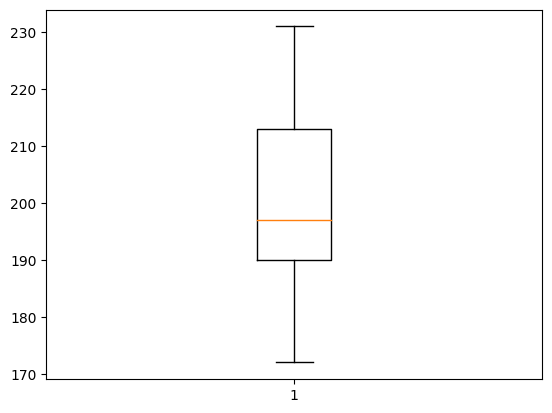

In [137]:
plt.boxplot(x='flipper_length_mm', data = penguins_clean)
plt.show()

Una vez tenemos nuestro dataset limpio, procedemos aplicar un one-hot-encoding para nuestra variable categórica "Sex":

In [138]:
penguins_onehot = pd.get_dummies(penguins_clean, prefix="", drop_first=True)
penguins_onehot.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,_FEMALE,_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


Y ahora, estandarizamos los datos:

In [139]:
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_onehot)
penguins_preprocessed

array([[-0.90552018,  0.79312591, -1.42812496, -0.56970896, -0.99103121,
         0.99700149],
       [-0.83193838,  0.12850298, -1.07152207, -0.50757924,  1.00904996,
        -1.00300753],
       [-0.68477478,  0.43525202, -0.42963687, -1.1910061 ,  1.00904996,
        -1.00300753],
       ...,
       [ 1.17316569, -0.74061931,  1.49601872,  1.91547962, -0.99103121,
         0.99700149],
       [ 0.21660228, -1.20074288,  0.78281295,  1.23205276,  1.00904996,
        -1.00300753],
       [ 1.08118844, -0.53611995,  0.85413352,  1.48057162, -0.99103121,
         0.99700149]])

Utilizamos PCA para obtener el número de componentes principales. Podemos ver que la mayoría de la varianza es explicada con las 2 primeras componentes principales:


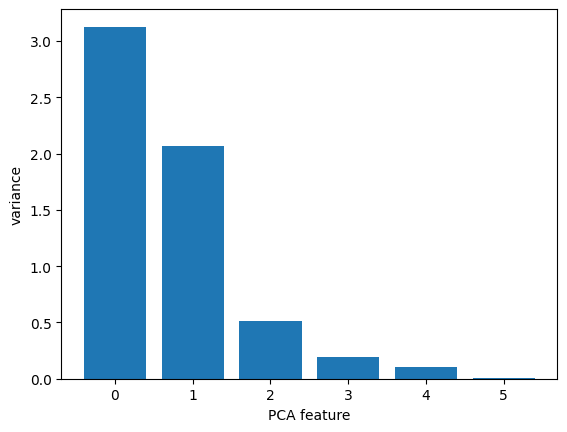

In [140]:
pca = PCA()
pca.fit(penguins_preprocessed)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


Ahora sí, aplicamos PCA con 2 componentes principales para reducir la dimensionalidad de nuestros datos:

In [141]:
n_components = 2
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Print the shape of pca_features
print(penguins_PCA.shape)


(333, 2)


Para empezar con el agrupamiento, primero debemos determinar cuál será el número de clusters y para ello realizaremos un análisis de codo:

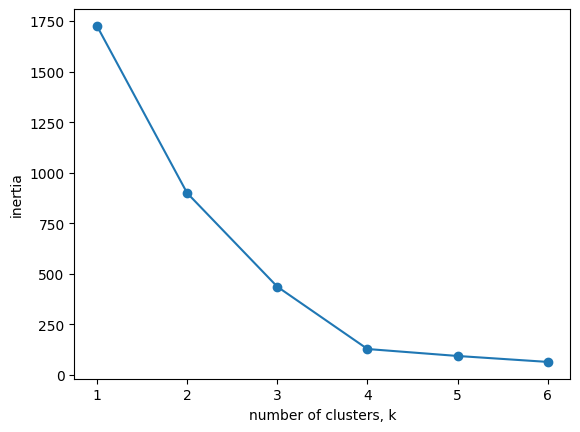

In [142]:
ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(penguins_PCA)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


El análisis de codo nos indica que 4 es un buen número de cústers. 

Ahora sí, creamos el modelo KMeans que nos agrupará nuestros datos en estas 4 clases:

In [143]:
n_clusters = 4

# Create a KMeans model with 4 clusters: model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Use fit_predict to fit model and obtain cluster labels: labels
kmeans.fit_predict(penguins_PCA)

# Create a DataFrame with labels and varieties as columns: df
penguins_clean['label'] = kmeans.labels_

penguins_clean



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
4,36.7,19.3,193.0,3450.0,FEMALE,1
5,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,2
340,46.8,14.3,215.0,4850.0,FEMALE,2
341,50.4,15.7,222.0,5750.0,MALE,3
342,45.2,14.8,212.0,5200.0,FEMALE,2


Si visualizamos nuestros datos tomando las 2 primeras componentes principales, vemos claramente cómo se dividen en 4 grupos:

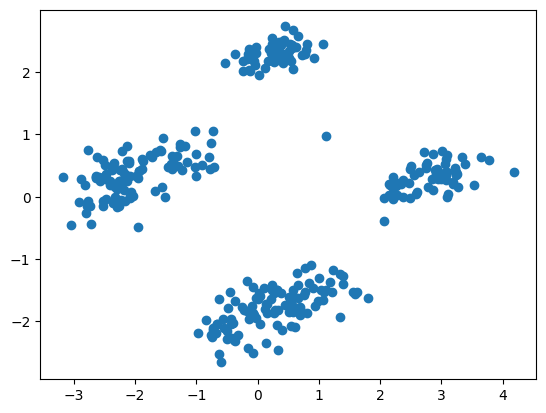

In [144]:
xs = penguins_PCA[:,0]
ys = penguins_PCA[:,1]
plt.scatter(xs, ys)
plt.show()

Finalmente, creamos una tabla para observar las medias de cada característica agrupadas por clase:

In [145]:
stat_penguins = penguins_clean.groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
